In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_train = pd.read_csv("california_housing_train.csv")
print(f"Size Train: {len(df_train)}")

df_test = pd.read_csv("california_housing_test.csv")
print(f"Size Test: {len(df_test)}")

Size Train: 17000
Size Test: 3000


In [2]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
round(df_train.describe(),2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00
mean,-119.56,35.63,28.59,2643.66,539.41,1429.57,501.22,3.88,207300.91
std,2.01,2.14,12.59,2179.95,421.50,1147.85,384.52,1.91,115983.76
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.79,33.93,18.00,1462.00,297.00,790.00,282.00,2.57,119400.00
50%,-118.49,34.25,29.00,2127.00,434.00,1167.00,409.00,3.54,180400.00
75%,-118.00,37.72,37.00,3151.25,648.25,1721.00,605.25,4.77,265000.00
max,-114.31,41.95,52.00,37937.00,6445.00,35682.00,6082.00,15.00,500001.00


# Outliers Removal

In [4]:
df_train = pd.read_csv("california_housing_train.csv")
Q1 = df_train.describe().loc["25%", "total_rooms":"median_income"].to_dict()
Q3 = df_train.describe().loc["75%", "total_rooms":"median_income"].to_dict()
IQR = {q:Q3[q] - Q1[q] for q in Q1.keys()}
upper_bound = {q:Q3[q]+1.5*IQR[q] for q in Q1.keys()}
lower_bound = {q:Q1[q]-1.5*IQR[q] for q in Q1.keys()}

Q1, Q3, IQR, upper_bound, lower_bound

({'total_rooms': 1462.0,
  'total_bedrooms': 297.0,
  'population': 790.0,
  'households': 282.0,
  'median_income': 2.566375},
 {'total_rooms': 3151.25,
  'total_bedrooms': 648.25,
  'population': 1721.0,
  'households': 605.25,
  'median_income': 4.767},
 {'total_rooms': 1689.25,
  'total_bedrooms': 351.25,
  'population': 931.0,
  'households': 323.25,
  'median_income': 2.2006250000000005},
 {'total_rooms': 5685.125,
  'total_bedrooms': 1175.125,
  'population': 3117.5,
  'households': 1090.125,
  'median_income': 8.067937500000001},
 {'total_rooms': -1071.875,
  'total_bedrooms': -229.875,
  'population': -606.5,
  'households': -202.875,
  'median_income': -0.7345625000000009})

In [5]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [6]:
print(len(df_train))
for q in Q1.keys():
  condition = (df_train[q] < lower_bound[q]) | (df_train[q] > upper_bound[q])
  df_train = df_train[~condition]
  print(len(df_train))

17000
15924
15666
15460
15451
14951


In [7]:
df_train.shape

(14951, 9)

In [8]:
X = df_train.iloc[:, 0:-1]
y = df_train.iloc[:, -1]
X.shape, y.shape

((14951, 8), (14951,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12708, 8), (2243, 8), (12708,), (2243,))

In [10]:
# baseline model
y_train_mean = y_train.mean()

In [11]:
y_train_base = np.full(y_train.shape, y_train_mean)
assert y_train_base.shape[0] == y_train.shape[0]

In [12]:
baseline_rmse = mean_squared_error(y_train, y_train_base, squared=False)
baseline_mae = mean_absolute_error(y_train, y_train_base)

print(f'Baseline RMSE: {baseline_rmse:.2f}')
print(f'Baseline MAE: {baseline_mae:.2f}')

Baseline RMSE: 107473.84
Baseline MAE: 84659.03


c:\python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_train_predict = linReg.predict(X_train)

training_rmse = mean_squared_error(y_train, y_train_predict, squared=False)
training_mae = mean_absolute_error(y_train, y_train_predict)

print(f'Training RMSE: {training_rmse:.2f}')
print(f'Training MAE: {training_mae:.2f}')

Training RMSE: 66430.53
Training MAE: 49085.58


c:\python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_train, y_train)
mean_squared_error(y_test, linReg.predict(X_test))

4518614056.609168

# Decision Tree

In [15]:
dtreeReg = DecisionTreeRegressor(criterion="squared_error")
dtreeReg.fit(X_train, y_train)
mean_squared_error(y_test, dtreeReg.predict(X_test))

5075404739.404815

# SVM

In [16]:
from sklearn.svm import SVR

svReg = SVR(kernel="linear")
svReg.fit(X_train, y_train)
mean_squared_error(y_test, svReg.predict(X_test))

8619980965.681896

In [17]:
svReg = SVR(kernel="rbf")
svReg.fit(X_train, y_train)
mean_squared_error(y_test, svReg.predict(X_test))

12257130895.114044

In [18]:
svReg = SVR(kernel="poly")
svReg.fit(X_train, y_train)
mean_squared_error(y_test, svReg.predict(X_test))

12133905749.854404

# XGBoost

In [19]:
import xgboost as xgb

xgbReg = xgb.XGBRegressor()
xgbReg.fit(X_train, y_train)
mean_squared_error(y_test, xgbReg.predict(X_test))

2370028597.706199

# Random Forrest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rfReg = RandomForestRegressor(n_estimators=50)
rfReg.fit(X_train, y_train)
mean_squared_error(y_test, rfReg.predict(X_test))

2581509436.859606

# NN/MLP

In [21]:
from tensorflow import keras
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

input = Input(shape=(X_train.shape[1],))
hidden1 = Dense(128, activation="relu")(input)
hidden2 = Dense(64, activation="relu")(hidden1)
output = Dense(1)(hidden2)
model = Model(inputs=input, outputs=output)

print(model.summary())

plot_model(model)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [22]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

In [23]:
train_result = model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=32)

Epoch 1/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - loss: 35140665344.0000
Epoch 2/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 15152521216.0000
Epoch 3/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 12252641280.0000
Epoch 4/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 9665876992.0000
Epoch 5/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 9457273856.0000
Epoch 6/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 9215456256.0000
Epoch 7/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 9232124928.0000
Epoch 8/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 8977666048.0000
Epoch 9/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 9153216512.0000
Epoch 10/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 8817568768.0000


In [24]:
model.evaluate(X_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 8483895808.0000


9073048576.0

#Multi Layer Perceptron

In [25]:
from sklearn.neural_network import MLPRegressor

In [26]:
MLP = MLPRegressor(random_state=42)

In [27]:
MLP.fit(X_train, y_train)

c:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42)

In [28]:
# predict on training set

y_train_pred_MLP = MLP.predict(X_train)

# get performance metrics for training set

training_rmse_MLP = mean_squared_error(y_train, y_train_pred_MLP, squared=False)
training_mae_MLP = mean_absolute_error(y_train, y_train_pred_MLP)

print(f'MLP Training RMSE: {training_rmse_MLP:.2f}')
print(f'MLP Training MAE: {training_mae_MLP:.2f}')

MLP Training RMSE: 92946.42
MLP Training MAE: 72571.31


c:\python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Test All Regression Models on New Data

In [29]:
X_new = df_test.iloc[:, 0:-1]
y_new = df_test.iloc[:, -1]
X_new.shape, y_new.shape

((3000, 8), (3000,))

In [30]:
mseLinReg = mean_squared_error(y_new, linReg.predict(X_new))
mseDtreeReg = mean_squared_error(y_new, dtreeReg.predict(X_new))
mseSVReg = mean_squared_error(y_new, svReg.predict(X_new))
mseXGBReg = mean_squared_error(y_new, xgbReg.predict(X_new))
mseRfReg = mean_squared_error(y_new, rfReg.predict(X_new))
mseNNReg = model.evaluate(X_new, y_new)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 10774876160.0000


In [31]:
print(f"MSE Linear Regression: {mseLinReg}")
print(f"MSE Single Decision Tree: {mseDtreeReg}")
print(f"MSE Random Forest: {mseRfReg}")
print(f"MSE XGBoost: {mseXGBReg}")
print(f"MSE SVM: {mseSVReg}")
print(f"MSE NN/MLP: {mseNNReg}")

MSE Linear Regression: 5566031385.981216
MSE Single Decision Tree: 5263094533.714
MSE Random Forest: 2766754240.08203
MSE XGBoost: 2618908282.4264297
MSE SVM: 43591759567.40389
MSE NN/MLP: 10987891712.0


In [32]:
# Save the model to a file
import pickle
with open('house_xgb_model.pkl', 'wb') as file:
    pickle.dump(xgbReg, file)

In [33]:
# Load the model from the file
with open('house_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded model for predictions
predictions = loaded_model.predict(X_new)
print(predictions)

[442591.7  182283.53 279439.   ...  71310.6  267484.5  516662.97]


In [34]:
import joblib
# Save the Model using joblib.dump()
joblib.dump(xgbReg, 'house_xgb_model.joblib')

# Load the Model using joblib.load() 
loaded_modelxgb = joblib.load('house_xgb_model.joblib')

# Make Predictions with the Loaded Model
predictions = loaded_modelxgb.predict(X_new)
print(predictions)

[442591.7  182283.53 279439.   ...  71310.6  267484.5  516662.97]


In [36]:
#pip install shap

Note: you may need to restart the kernel to use updated packages.Collecting shap
   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/456.2 kB 3.5 MB/s eta 0:00:01
   -------------------- ------------------- 235.5/456.2 kB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 348.2/456.2 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.7 MB 4.6 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.7 MB 4.0 MB/s eta 0:00:01
   -------- ------------------------------- 0.6/2.7 MB 4.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.7 MB 4.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.7 MB 4.0 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.7 MB 3.5 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


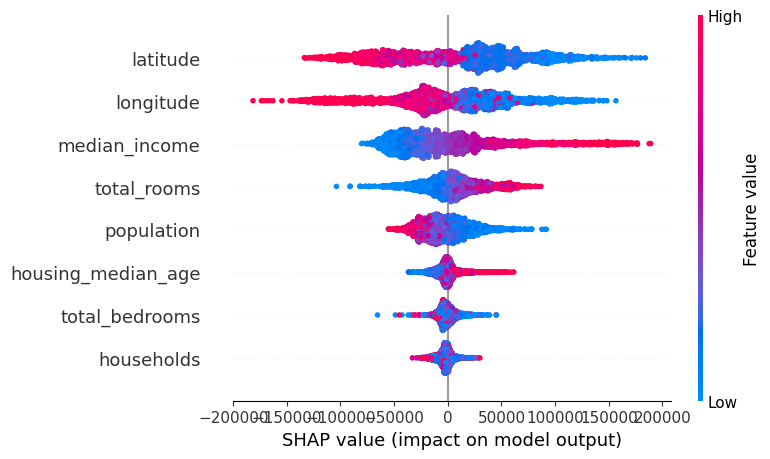

In [68]:
import shap
import matplotlib.pyplot as plt
import xgboost  # Make sure xgboost is imported

# Get feature names from the trained model
feature_names = xgbReg.get_booster().feature_names
print(feature_names) 

# Choose the feature for analysis (use one variable, not two)
feature_to_analyze = 'median_income'  

# Create a TreeExplainer 
explainer = shap.TreeExplainer(xgbReg)

# Calculate SHAP values
shap_values = explainer.shap_values(X_new)

# Summary Plot
shap.summary_plot(shap_values, X_new, feature_names=feature_names)

plt.show() 

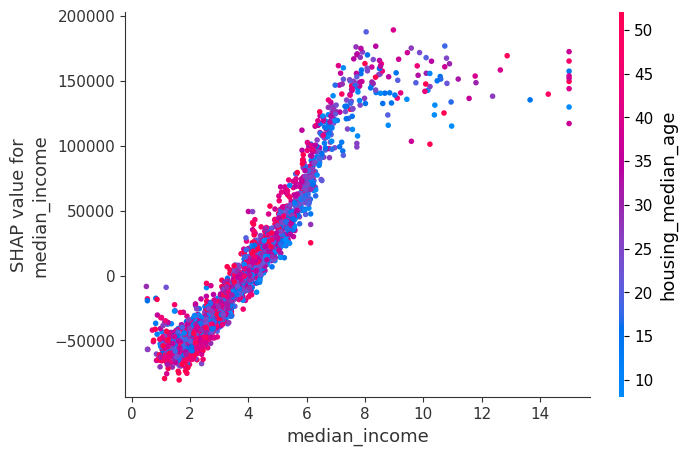

In [69]:
# Dependence Plot
shap.dependence_plot(feature_to_analyze, shap_values, X_new, 
                     feature_names=feature_names) 


plt.show() 

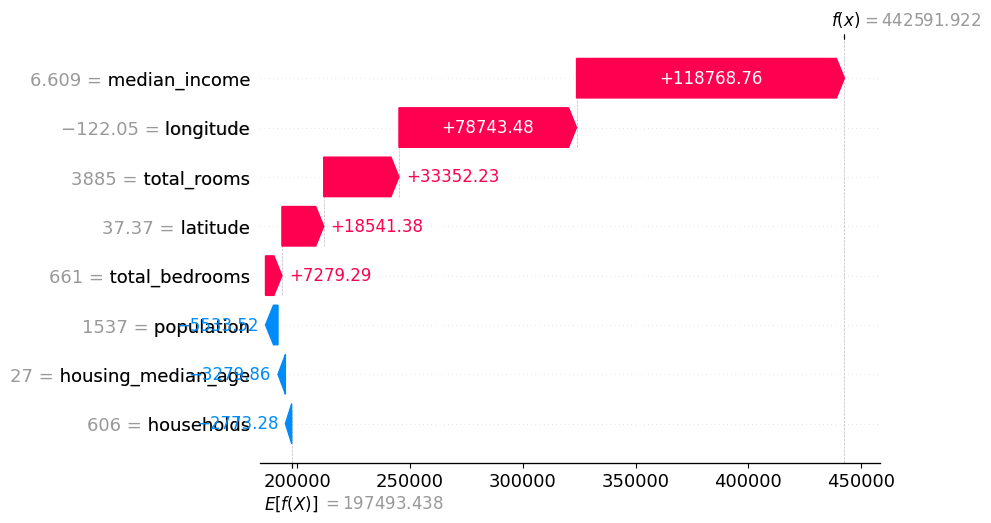

In [70]:

# Waterfall Plot (Corrected)
# Create an Explanation object for the first instance in X_new
explanation = shap.Explanation(values=shap_values[0], 
                             base_values=explainer.expected_value,
                             data=X_new.iloc[0],  
                             feature_names=feature_names)

shap.plots.waterfall(explanation)  # Pass the Explanation object
plt.show()